# Example of Dynamical Systems : Lotka - Volterra && Mass-Spring

see http://scipy-cookbook.readthedocs.io/ (ODE section) for more

In [1]:
from scipy.integrate import odeint
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline
# this line renders the images as png 
# - works well for static plots (recommended then)
# - does not work with animations (will only show last frame)


# Text Cell
Text cells are area of a notebook that are dedicated to text. A notebook is made of two kinds of cells
- text cells
- code cells

You can write an introduction to the notebook<br>
- What you mean to achieve
- How you chose the parameters 
etc...

# Lotka - Volterra

In [2]:
# This is a code cell btw


# The Dynamical System we aim to solve
# Note that the parameters of the system are defined inside the function , rather than outside
# This is a big constraint in practice since it does not let us do any parameter sensitivity analysis
# We will see later how to pass the parameters when we call the system


def LotkaVolterra(state,t):
    # 1 - unpacking the state vector
    # MO: rename the components of the vector to make the code more explicit 

    x = state[0]
    y = state[1]
  
    # 2 - model parameters
    alpha = 0.1
    beta =  0.1
    sigma = 0.1
    gamma = 0.1
  
    # 3 - equations for system 
    xd = x*(alpha - beta*y) # derivative of x
    yd = -y*(gamma - sigma*x) # derivative of y
    
    # 4 - return 
    return [xd,yd]



Please note the 1-2-3-4 structure 
It is always like that!

## Simulating the System

In [3]:
t = np.arange(0,500,1)
# time vector
# range of simulation (0 ->500 with step of 0.1)

state0 = [0.5,0.5] # Initial Condition of the Simulation
system0 = odeint(LotkaVolterra,state0,t)
# We solve the system 

state1 = [1,0.5] # Another Initial Condition
system1 = odeint(LotkaVolterra,state1,t)
# We solve the system 


## Displays

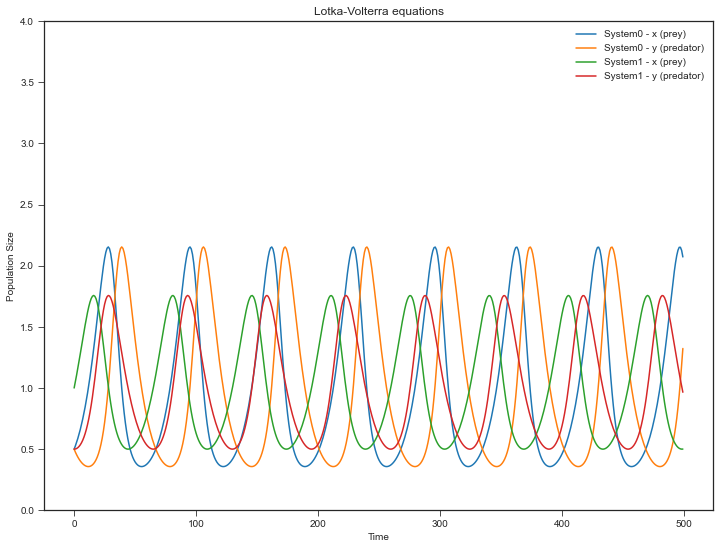

In [4]:
# Now we plot the results for both initial conditions
# LV exhibits a weird property called orbital stability (look it up)

plt.style.use('seaborn-ticks')
fig = plt.figure(figsize=(12,9))

plt.plot(t,system0)
plt.plot(t,system1)
plt.ylim([0,4])
plt.xlabel('Time')
plt.ylabel('Population Size')
plt.legend(('System0 - x (prey)','System0 - y (predator)','System1 - x (prey)','System1 - y (predator)'))
plt.title('Lotka-Volterra equations')
plt.show()

## Display in StateSpace
That's nice<br>
Now let's plot in the state space <br>
This way you will see what orbital stability really looks like

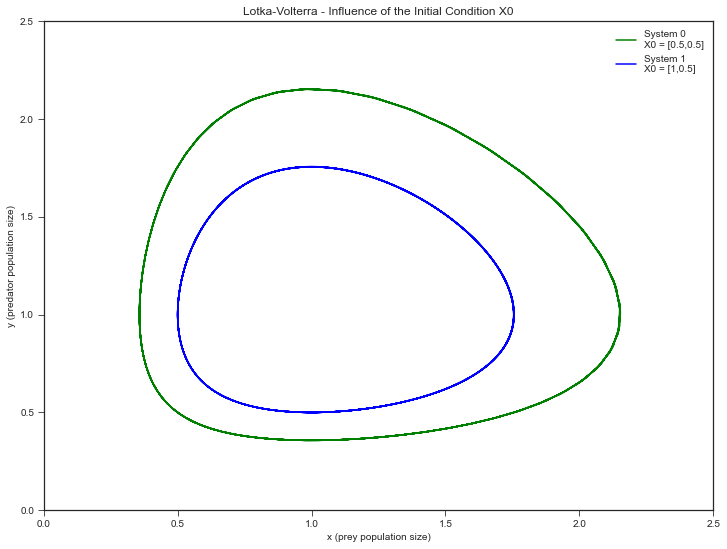

In [5]:
plt.style.use('seaborn-ticks')
fig = plt.figure(figsize=(12,9))
plt.plot(system0[:,0],system0[:,1],'g-')
plt.plot(system1[:,0],system1[:,1],'b-')
plt.xlim([0,2.5])
plt.ylim([0,2.5])
plt.xlabel('x (prey population size)')
plt.ylabel('y (predator population size)')
plt.legend(('System 0 \nX0 = [0.5,0.5]','System 1 \nX0 = [1,0.5]'))
fig_title = u'Lotka-Volterra - Influence of the Initial Condition X0'
plt.title(fig_title)
plt.show()

# Mass - Spring System
<br>
Let's now switch to the classic mass-spring system which is a 2nd order linear system
We can turn it into a dynamical system by adding a dimension - corresponding to the velocity

In [6]:
def MassSpring(state,t):
    # unpack the state vector
    x = state[0] # position
    xd = state[1] #velocity

    # these are our constants
    k = -2.5 # Newtons per metre
    m = 1.5 # Kilograms
    g = 9.8 # metres per second

    # compute acceleration xdd
    xdd = ((k*x)/m) + g

    # return the two state derivatives
    return [xd, xdd]

In [7]:
state0 = [0.0, 0.0]
t = np.arange(0.0, 10.0, 0.1)

system = odeint(MassSpring, state0, t)

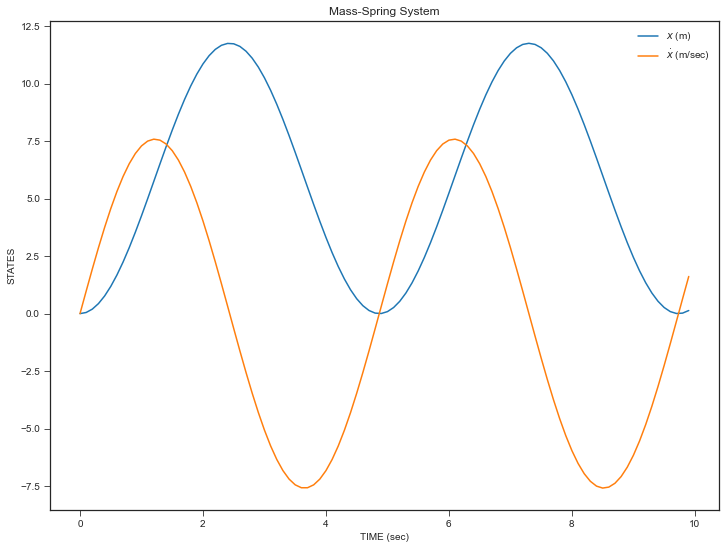

In [8]:
plt.style.use('seaborn-ticks')
fig = plt.figure(figsize=(12,9))

plt.plot(t, system)
plt.xlabel('TIME (sec)')
plt.ylabel('STATES')
plt.title('Mass-Spring System')
plt.legend(('$x$ (m)', '$\dot{x}$ (m/sec)'))
plt.show()

# Technical Addendum
In the previous examples, the parameters of the dynamical systems were encoded within the function.<br>
This works well enough, but passing the parameters as arguments of the function would be more flexible.<br>
For instance, it would enable us to loop over an array of parameters and illustrate the influence of parameters on the system.

This is how it can be done.

In [9]:
# First Way to pass on parameters - Not the cleanest one

def MassSpring2(state,t,k,m):
    # unpack the state vector
    x = state[0]
    xd = state[1]

    # these are our constants
    #k = -2.5 # Newtons per metre
    #m = 1.5 # Kilograms
    # these parameters are now passed as arguments of the function  
    g = 9.8 # metres per second

    # compute acceleration xdd
    xdd = ((k*x)/m) + g

    # return the two state derivatives
    return [xd, xdd]


In [10]:
k = -2.5 # Newtons per metre
m = 1.5 # Kilograms
# parameters now defined outside of the function

state0 = [0.0, 0.0]
t = np.arange(0.0, 10.0, 0.1)

state = odeint(MassSpring2, state0, t,args=(k,m))

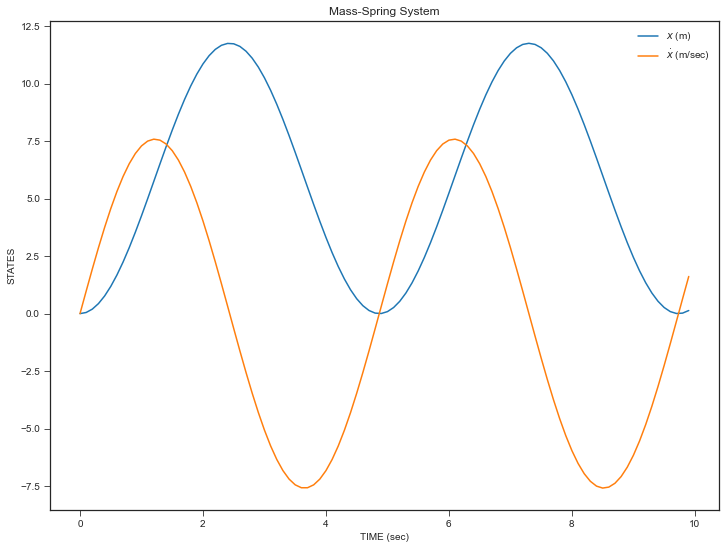

In [11]:
plt.style.use('seaborn-ticks')
fig = plt.figure(figsize=(12,9))

plt.plot(t, state)
plt.xlabel('TIME (sec)')
plt.ylabel('STATES')
plt.title('Mass-Spring System')
plt.legend(('$x$ (m)', '$\dot{x}$ (m/sec)'))
plt.show()

In [12]:
#Changing stiffness k
k = -10 # Newtons per metre
#stiffness *4 => frequence y *2
# parameters now defined outside of the function
# So it is no problem

state0 = [0.0, 0.0]
t = np.arange(0.0, 10.0, 0.1)

state = odeint(MassSpring2, state0, t,args=(k,m))

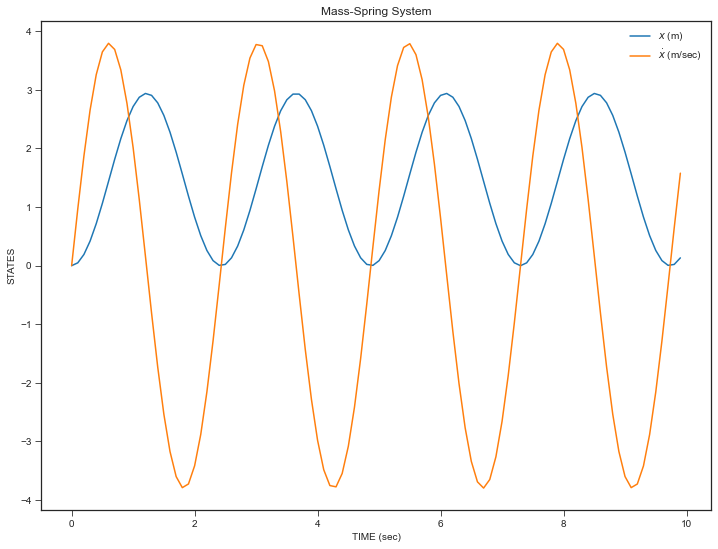

In [13]:
plt.style.use('seaborn-ticks')
fig = plt.figure(figsize=(12,9))

plt.plot(t, state)
plt.xlabel('TIME (sec)')
plt.ylabel('STATES')
plt.title('Mass-Spring System')
plt.legend(('$x$ (m)', '$\dot{x}$ (m/sec)'))
plt.show()

# Final Addendum
we can pass the parameters as a single vector as follows

Advantages include:
- more concise
- more modular
- parameters can be function of states (probably not recommended)...

In [14]:
def MassSpring3(state,t,p):
    # unpack the state vector
    x = state[0]
    xd = state[1]
  
    # we now unpack the parameter vector
    k = p[0] # Newtons per metre
    m = p[1] # Kilograms
    g = p[2] # metres per second

    # compute acceleration xdd
    xdd = ((k*x)/m) + g

    # return the two state derivatives
    return [xd, xdd]

In [15]:
k = -2.5 # Newtons per metre
m = 1.5 # Kilograms
g = 9.8 # metres per second
# parameters now defined outside of the function
p = (k,m,g)

state0 = [0.0, 0.0]
t = np.arange(0.0, 10.0, 0.1)

state = odeint(MassSpring3, state0, t,args=(p,)) # Please note the comma!!!! 

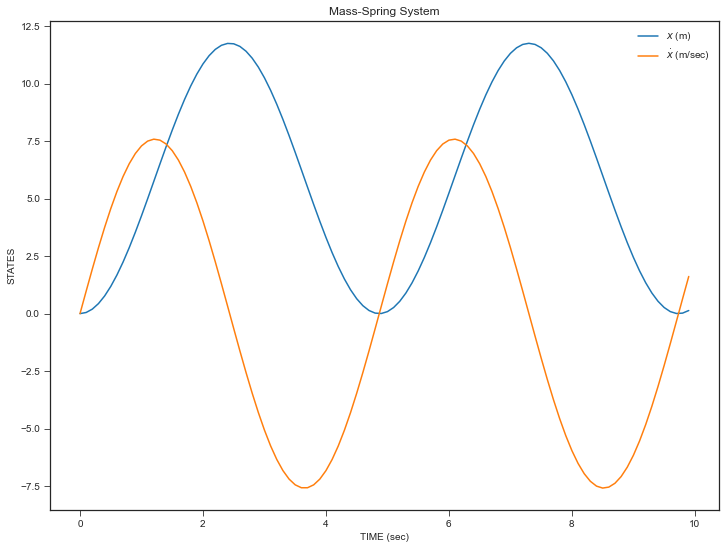

In [16]:
plt.style.use('seaborn-ticks')
fig = plt.figure(figsize=(12,9))

plt.plot(t, state)
plt.xlabel('TIME (sec)')
plt.ylabel('STATES')
plt.title('Mass-Spring System')
plt.legend(('$x$ (m)', '$\dot{x}$ (m/sec)'))
plt.show()